In [56]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
df = pd.DataFrame(columns=['name', 'date', 'product_id', 'quantity'])

In [42]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-alekseev-38/shared/homeworks/python_ds_miniprojects/4/data'

In [43]:
for date_folder in os.listdir(path):
    if not os.path.isdir(os.path.join(path, date_folder)):
        continue
    date = date_folder
    
    for user_folder in os.listdir(os.path.join(path, date_folder)):
        user_name = user_folder
        for file_name in os.listdir(os.path.join(path, date_folder, user_folder)):
            if not file_name.endswith('.csv'):
                continue
            file_path = os.path.join(path, date_folder, user_folder, file_name)
            data = pd.read_csv(file_path)
            data['name'] = user_name
            data['date'] = date
        
            df = pd.concat([df, data[['name', 'date', 'product_id', 'quantity']]])

df = df.reset_index(drop=True)        


In [44]:
df.head()

,name,date,product_id,quantity
0,Petr_Ivanov,2020-12-05,27,4
1,Petr_Ivanov,2020-12-05,89,1
2,Petr_Ivanov,2020-12-05,33,2
3,Petr_Ivanov,2020-12-05,8,3
4,Petr_Ivanov,2020-12-05,16,1


In [55]:
df.groupby(['name'])['quantity'].sum().sort_values(ascending=False)

name
Petr_Smirnov         52
Alexey_Smirnov       52
Anton_Smirnov        45
Petr_Fedorov         34
Rostislav_Petrov     28
Kirill_Fedorov       28
Vasiliy_Ivanov       27
Alexey_Fedorov       24
Anton_Ivanov         23
Petr_Ivanov          21
Anton_Petrov         18
Kirill_Smirnov       17
Rostislav_Smirnov    17
Alexey_Ivanov        17
Rostislav_Fedorov    16
Vasiliy_Fedorov      15
Petr_Petrov          14
Kirill_Petrov         9
Rostislav_Ivanov      9
Alexey_Petrov         7
Vasiliy_Petrov        7
Name: quantity, dtype: int64

In [50]:
df[df['name'] == 'Alexey_Smirnov']

,name,date,product_id,quantity
46,Alexey_Smirnov,2020-12-09,56,5
47,Alexey_Smirnov,2020-12-09,55,1
48,Alexey_Smirnov,2020-12-09,55,5
49,Alexey_Smirnov,2020-12-09,4,4
50,Alexey_Smirnov,2020-12-09,95,1
75,Alexey_Smirnov,2020-12-04,64,2
76,Alexey_Smirnov,2020-12-04,24,5
77,Alexey_Smirnov,2020-12-04,23,3
78,Alexey_Smirnov,2020-12-04,9,4
79,Alexey_Smirnov,2020-12-04,82,5


In [90]:
all_time = df.groupby('date', as_index=False).agg({'quantity': 'sum'}).sort_values('date')
all_time

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


In [80]:
top_products = df['product_id'].agg({'quantity': 'sum'}).head(10)
top_products

quantity    7701
Name: product_id, dtype: int64

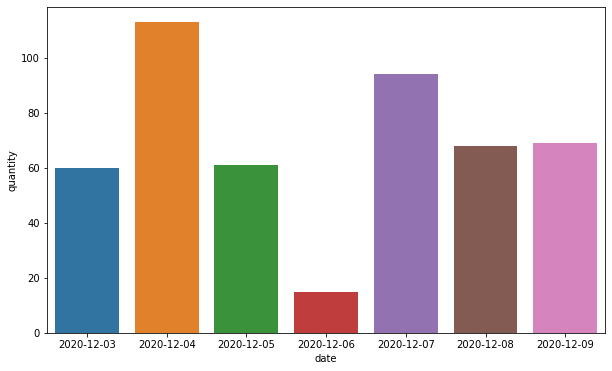

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x='date', y='quantity', data=all_time.head(10))

In [118]:
purchase = (df.groupby(['name', 'product_id'])['date'].nunique() > 1).sum()
purchase

2